<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Python_Pandas_Tutorial_12_Stack_Unstack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/pandas/12_stack'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
12_pandas_stack.ipynb  stocks_3_levels.xlsx  stocks.xlsx


In [5]:
df = pd.read_excel('/content/drive/MyDrive/py-master/pandas/12_stack/stocks.xlsx', header=[0,1])
df.head()

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

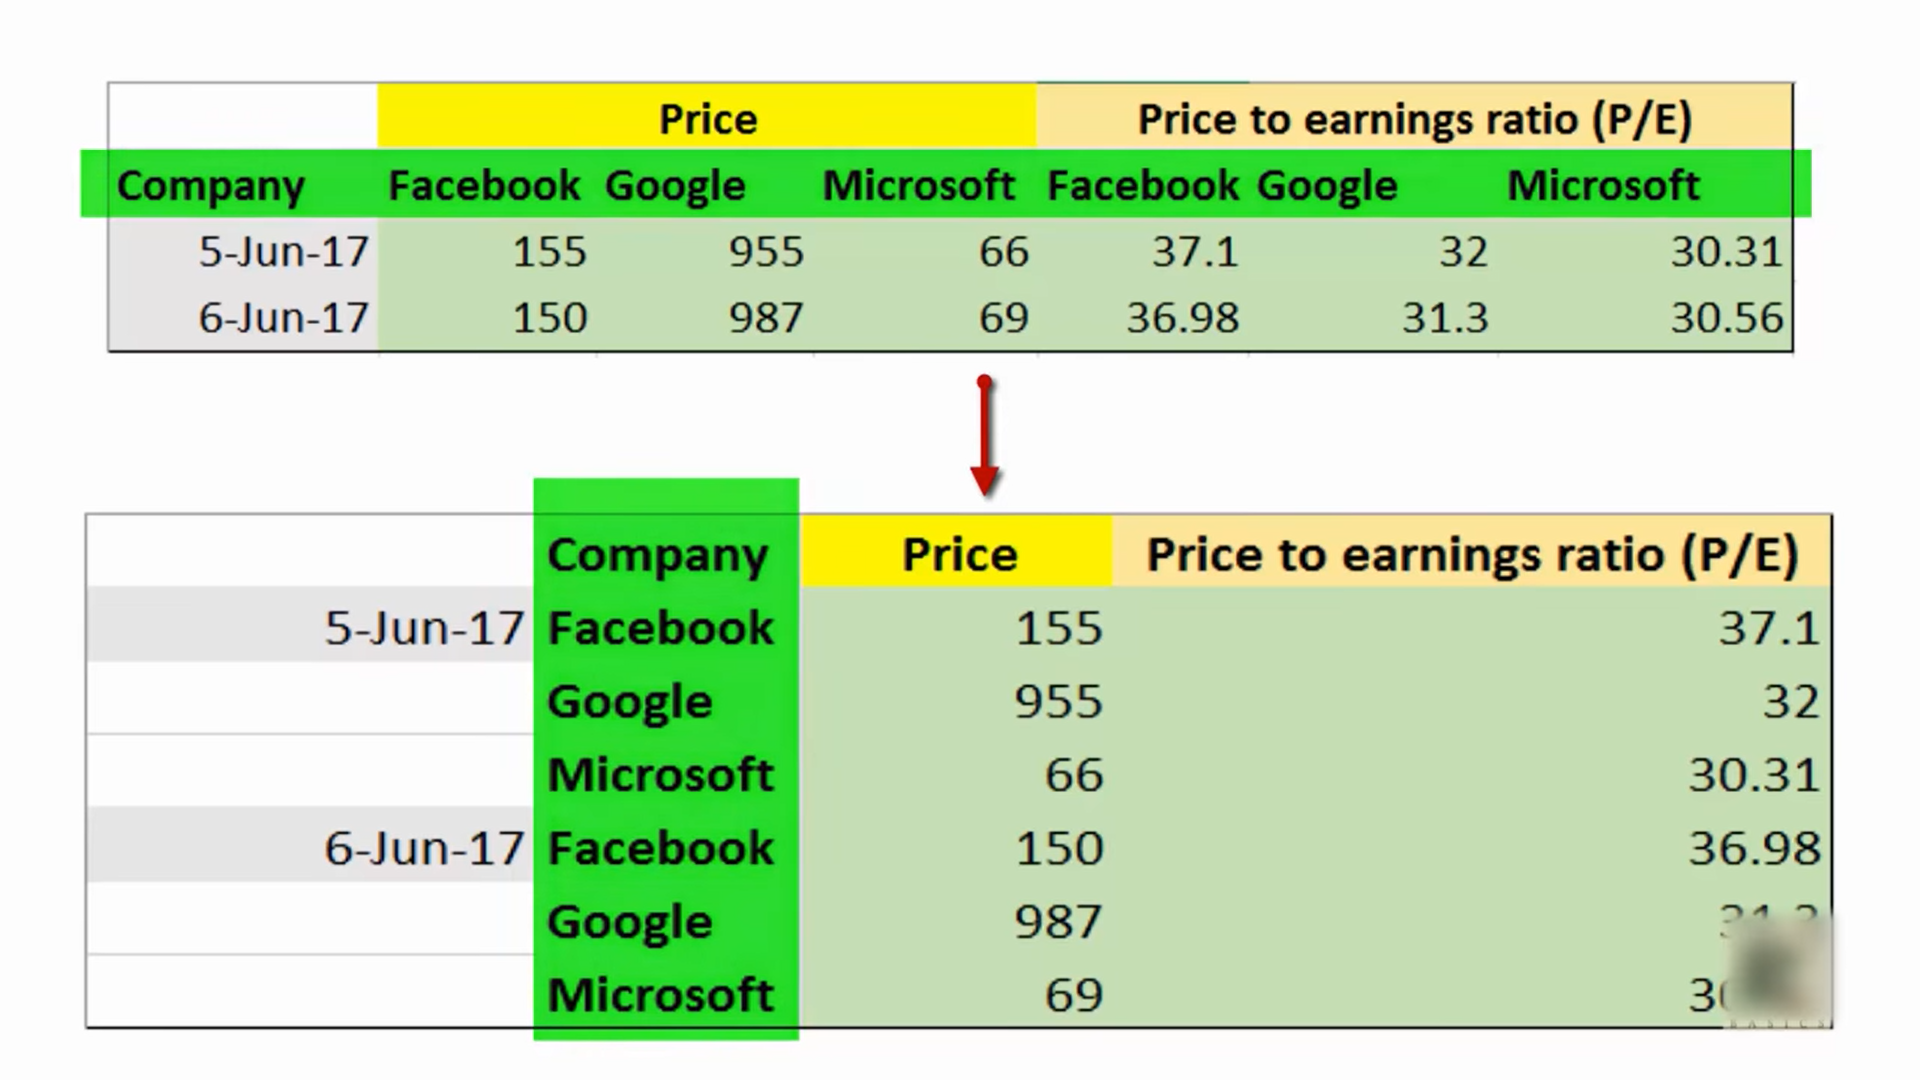

In [11]:
dfstacked=df.stack()
dfstacked

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [8]:
df.stack(level=0,dropna=True) # this output is not correctly formatted in colab, u can try this in pycharm or jupyter which will give a better result

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

# Unstack

In [12]:
dfstacked.unstack()# though the output here is not correct but u will get the right output in jupyter notebook

Price                            Price to earnings ratio (P/E)           \
  Company Facebook  Google Microsoft                       Company Facebook   
0     NaN    155.0   955.0      66.0                           NaN    37.10   
1     NaN    150.0   987.0      69.0                           NaN    36.98   
2     NaN    153.0   963.0      62.0                           NaN    36.78   
3     NaN    155.0  1000.0      61.0                           NaN    36.11   
4     NaN    156.0  1012.0      66.0                           NaN    37.07   

                   Unnamed: 0_level_0                            
  Google Microsoft            Company Facebook Google Microsoft  
0   32.0     30.31         2017-06-05      NaT    NaT       NaT  
1   31.3     30.56         2017-06-06      NaT    NaT       NaT  
2   31.7     30.46         2017-06-07      NaT    NaT       NaT  
3   31.2     30.11         2017-06-08      NaT    NaT       NaT  
4   30.0     31.00         2017-06-09      NaT    NaT       NaT

# multi level headers 

In [14]:
df = pd.read_excel('/content/drive/MyDrive/py-master/pandas/12_stack/stocks_3_levels.xlsx', header=[0,1,2])
df

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [15]:
df.stack() # by default it takes the inner most level, we can change the level from 0 to 1 or 2 depending on what we want

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [16]:
df.stack(level=1)

Income Statement                   \
                                        Facebook Google Microsoft   
0 Net Profit                                0.80   5.43      4.56   
  Net Sales                                 2.60  20.00     18.70   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
1 Net Profit                                0.97   5.89      5.10   
  Net Sales                                 3.10  22.00     21.30   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
2 Net Profit                                1.20   6.10      5.43   
  Net Sales                                 4.30  24.00     21.45   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
3 Net Profit                                1.67   6.50      5.89   
  Net Sales                                 6.70  26.00     21.88   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
4 Net Profit                                2.03   6.40      6.09   
  Net Sales                                 8.10  31.00     22.34   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   

                                Price Ratios                    \
                                    Facebook  Google Microsoft   
0 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00   955.0     66.00   
  Price to earnings ratio (P/E)        37.10    32.0     30.31   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
1 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               150.00   987.0     69.00   
  Price to earnings ratio (P/E)        36.98    31.3     30.56   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
2 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               153.00   963.0     62.00   
  Price to earnings ratio (P/E)        36.78    31.7     30.46   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
3 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00  1000.0     61.00   
  Price to earnings ratio (P/E)        36.11    31.2     30.11   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
4 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               156.00  1012.0     66.00   
  Price to earnings ratio (P/E)        37.07    30.0     31.00   
  Unnamed: 0_level_1                     NaN     NaN       NaN   

                                Unnamed: 0_level_0  
                                           Company  
0 Net Profit                                   NaN  
  Net Sales                                    NaN  
  Price                                        NaN  
  Price to earnings ratio (P/E)                NaN  
  Unnamed: 0_level_1                       Q1 2016  
1 Net Profit  

In [18]:
df.stack(level=2, dropna=True)

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN